In [35]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from decimal import Decimal


In [2]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-2')  # Replace with your region
table = dynamodb.Table('StockData')  # Replace with your table name


In [42]:
def fetch_data(topic_name):
    """
    Fetch data from DynamoDB based on the topic name.
    """
    response = table.scan()
    items = response['Items']

    # Filter data by topic name
    filtered_data = [item for item in items if item['topic_name'] == topic_name]
    
    # Convert to Pandas DataFrame
    df = pd.DataFrame(filtered_data)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['open_price'] = df['open_price'].apply(lambda x: float(x) if isinstance(x, Decimal) else x)
    df['close_price'] = df['close_price'].apply(lambda x: float(x) if isinstance(x, Decimal) else x)
    df['high_price'] = df['high_price'].apply(lambda x: float(x) if isinstance(x, Decimal) else x)
    df['low_price'] = df['low_price'].apply(lambda x: float(x) if isinstance(x, Decimal) else x)
    df['volume'] = df['volume'].astype(int)
    
    return df

In [37]:
# Convert DynamoDB Decimal to float
def decimal_to_float(item):
    """Convert DynamoDB Decimal values to float."""
    for key, value in item.items():
        if isinstance(value, Decimal):
            item[key] = float(value)
    return item

In [39]:
table_name = "StockData"  # Replace with your DynamoDB table name
year = 2024  # Replace with the year you want to visualize
topic_name1 = "apple_stock_data"  # Replace with your first topic
topic_name2 = "twitter_stock_data"

In [40]:
# Fetch data
print("Fetching data from DynamoDB...")
data = fetch_data(table_name)
data = [decimal_to_float(item) for item in data if item['topic_name'] == topic_name]
df = pd.DataFrame(data)

Fetching data from DynamoDB...


In [41]:
print(f"Visualizing data for {topic_name1}...")
visualize_data(data, year, topic_name1)

# Visualize for topic 2
print(f"Visualizing data for {topic_name2}...")
visualize_data(data, year, topic_name2)

Visualizing data for apple_stock_data...


UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

In [4]:
def visualize_data(df, topic_name):
    """
    Visualize trends in the data for the given topic.
    """
    # Line plot for open, close, high, and low prices over time
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['open_price'], label='Open Price', linestyle='-', marker='o')
    plt.plot(df['timestamp'], df['close_price'], label='Close Price', linestyle='-', marker='x')
    plt.plot(df['timestamp'], df['high_price'], label='High Price', linestyle='-', marker='^')
    plt.plot(df['timestamp'], df['low_price'], label='Low Price', linestyle='-', marker='v')
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.title(f"Price Trends for Topic: {topic_name}")
    plt.legend()
    plt.grid()
    plt.show()

    # Bar plot for trade volume
    plt.figure(figsize=(12, 6))
    plt.bar(df['timestamp'], df['volume'], color='orange', label='Volume')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.title(f"Trade Volume for Topic: {topic_name}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()


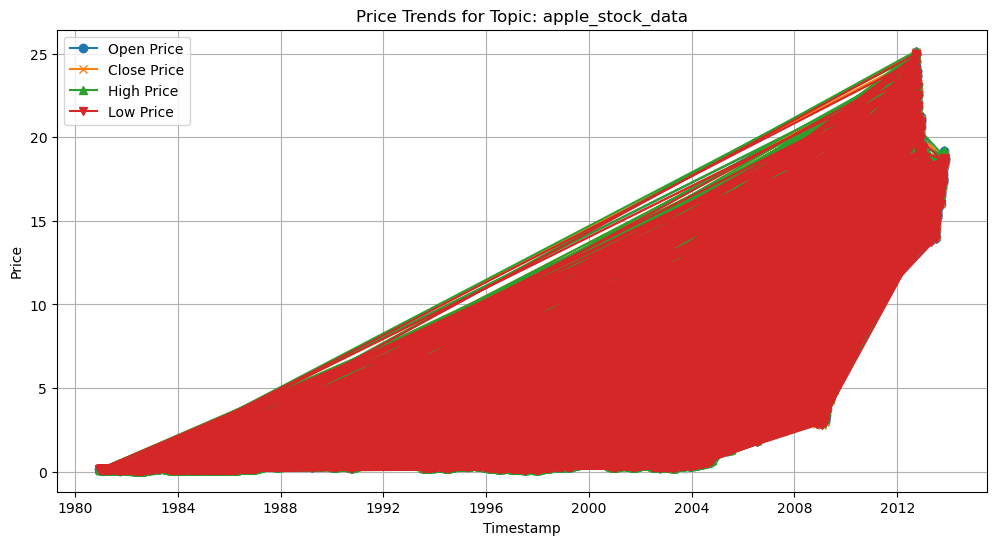

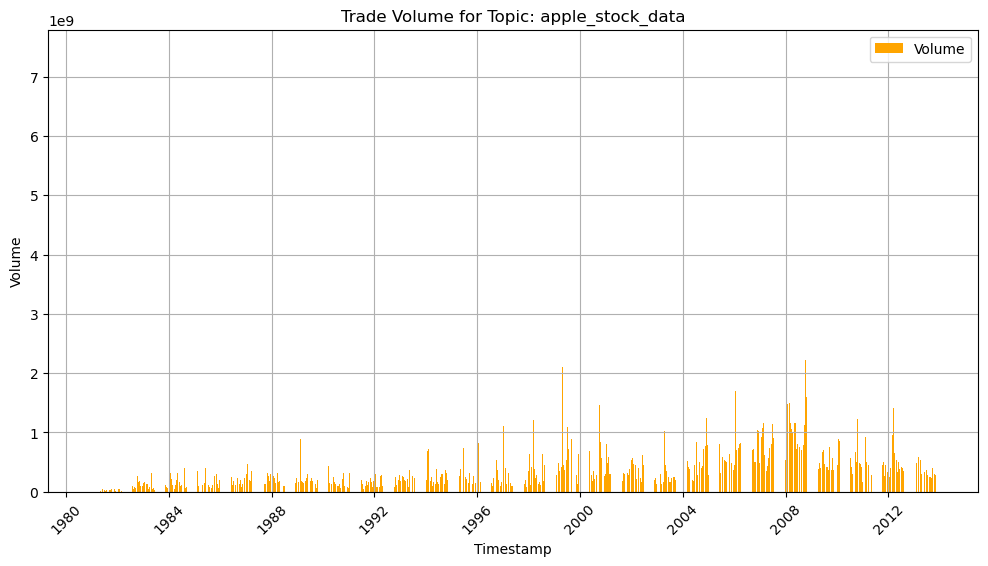

In [5]:
if __name__ == "__main__":
    # Define the topic name you want to visualize
    topic_name = "apple_stock_data"  # Replace with the desired topic name
    
    # Fetch data for the topic
    data = fetch_data(topic_name)

    if not data.empty:
        # Visualize the data
        visualize_data(data, topic_name)
    else:
        print(f"No data found for topic: {topic_name}")

In [6]:
# Fetch data for a specific topic
def fetch_data_by_topic(topic_name):
    response = table.scan(
        FilterExpression='topic_name = :topic',
        ExpressionAttributeValues={':topic': topic_name}
    )
    return response['Items']

In [7]:
def process_data(data):
    timestamps = []
    open_prices = []
    close_prices = []
    high_prices = []
    low_prices = []
    volumes = []

    for item in data:
        timestamps.append(datetime.strptime(item['timestamp'], '%Y-%m-%d'))
        open_prices.append(float(item['open_price']))
        close_prices.append(float(item['close_price']))
        high_prices.append(float(item['high_price']))
        low_prices.append(float(item['low_price']))
        volumes.append(int(item['volume']))

    return timestamps, open_prices, close_prices, high_prices, low_prices, volumes


In [8]:
# Visualize data
def visualize_data(timestamps, open_prices, close_prices, high_prices, low_prices, volumes, topic_name):
    plt.figure(figsize=(14, 8))

    # Plot open and close prices
    plt.plot(timestamps, open_prices, label='Open Price', marker='o')
    plt.plot(timestamps, close_prices, label='Close Price', marker='x')

    # Highlight high and low prices
    plt.fill_between(timestamps, low_prices, high_prices, color='gray', alpha=0.2, label='High-Low Range')

    # Set title and labels
    plt.title(f'Trend Analysis for Topic: {topic_name}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()

    plt.tight_layout()
    plt.show()


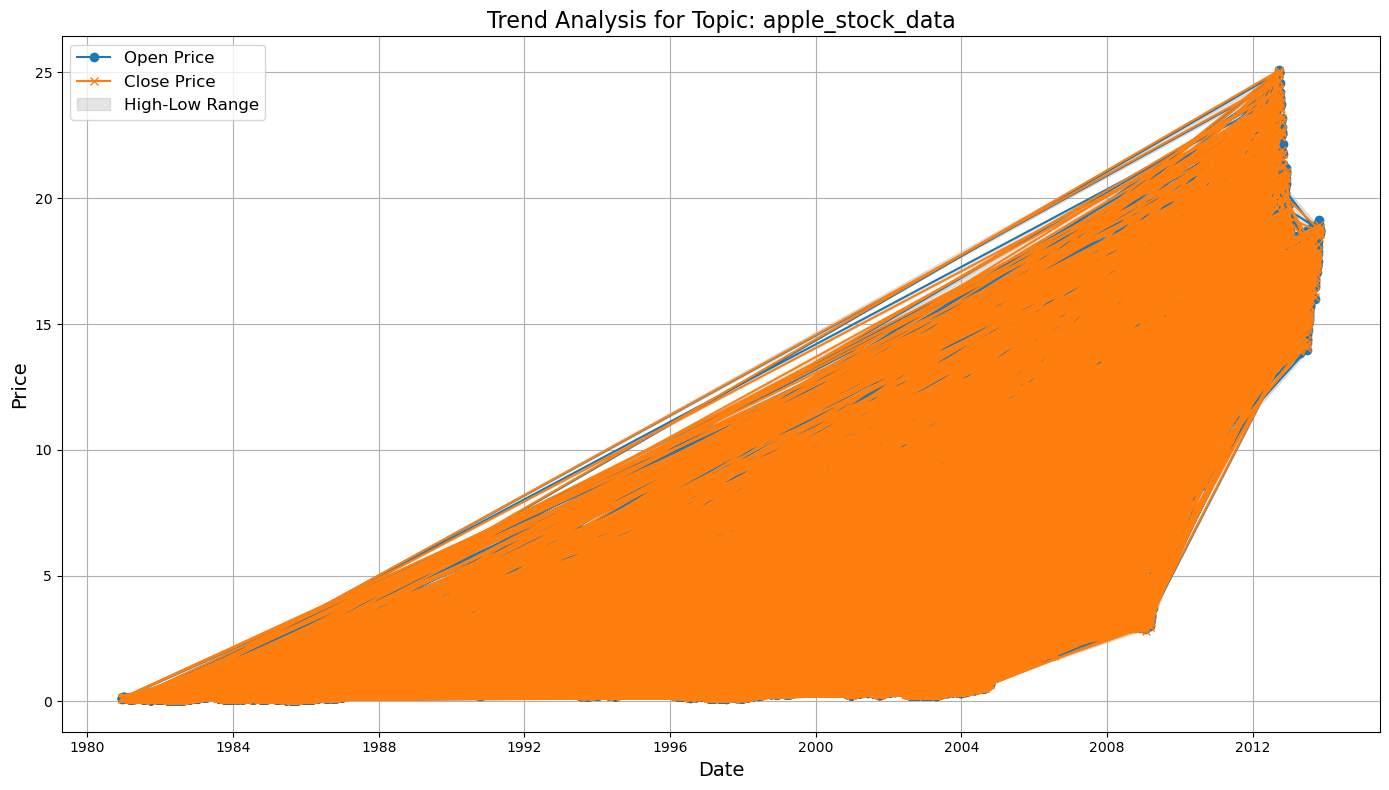

In [9]:
# Main function
if __name__ == '__main__':
    # Replace with your topic name
    topic_name = 'apple_stock_data'
    
    # Fetch and process data
    data = fetch_data_by_topic(topic_name)
    if not data:
        print(f"No data found for topic: {topic_name}")
    else:
        timestamps, open_prices, close_prices, high_prices, low_prices, volumes = process_data(data)
        # Visualize the data
        visualize_data(timestamps, open_prices, close_prices, high_prices, low_prices, volumes, topic_name)

In [10]:
import boto3

# Initialize DynamoDB resource
dynamodb = boto3.resource('dynamodb', region_name='us-east-2')  # Update region if needed
table = dynamodb.Table('StockData')

# Scan the table
response = table.scan()
data = response['Items']

# Print the data (optional)
print(data)


[{'low_price': Decimal('51.610001'), 'close_price': Decimal('52.82'), 'high_price': Decimal('52.959999'), 'timestamp': '2020-12-15', 'open_price': Decimal('52.02'), 'volume': Decimal('10868671'), 'topic_name': 'twitter_stock_data'}, {'low_price': Decimal('0.320313'), 'close_price': Decimal('0.334821'), 'high_price': Decimal('0.339844'), 'timestamp': '1998-10-19', 'open_price': Decimal('0.327567'), 'volume': Decimal('475776000'), 'topic_name': 'apple_stock_data'}, {'low_price': Decimal('34.25'), 'close_price': Decimal('34.700001'), 'high_price': Decimal('34.970001'), 'timestamp': '2018-05-31', 'open_price': Decimal('34.389999'), 'volume': Decimal('14282870'), 'topic_name': 'twitter_stock_data'}, {'low_price': Decimal('1.864286'), 'close_price': Decimal('1.864643'), 'high_price': Decimal('1.926786'), 'timestamp': '2005-10-18', 'open_price': Decimal('1.901786'), 'volume': Decimal('609588000'), 'topic_name': 'apple_stock_data'}, {'low_price': Decimal('12.196429'), 'close_price': Decimal('1

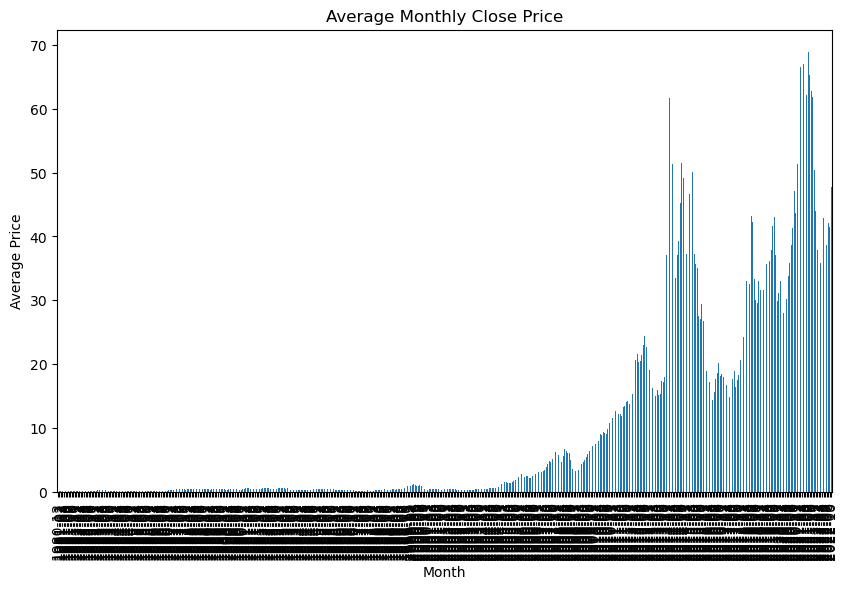

In [12]:
# Convert DynamoDB data to Pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns from Decimal to float
for col in ['open_price', 'close_price', 'high_price', 'low_price', 'volume']:
    df[col] = df[col].apply(lambda x: float(x))

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Example: Plot average monthly close price
df['month'] = df['timestamp'].dt.to_period('M')
avg_monthly_price = df.groupby('month')['close_price'].mean()

# Plotting
avg_monthly_price.plot(kind='bar', title='Average Monthly Close Price', xlabel='Month', ylabel='Average Price', figsize=(10, 6))
plt.show()

In [13]:
import pandas as pd

# Convert DynamoDB data to a Pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns from string/Decimal to float for plotting
df['open_price'] = df['open_price'].astype(float)
df['close_price'] = df['close_price'].astype(float)
df['high_price'] = df['high_price'].astype(float)
df['low_price'] = df['low_price'].astype(float)
df['volume'] = df['volume'].astype(int)


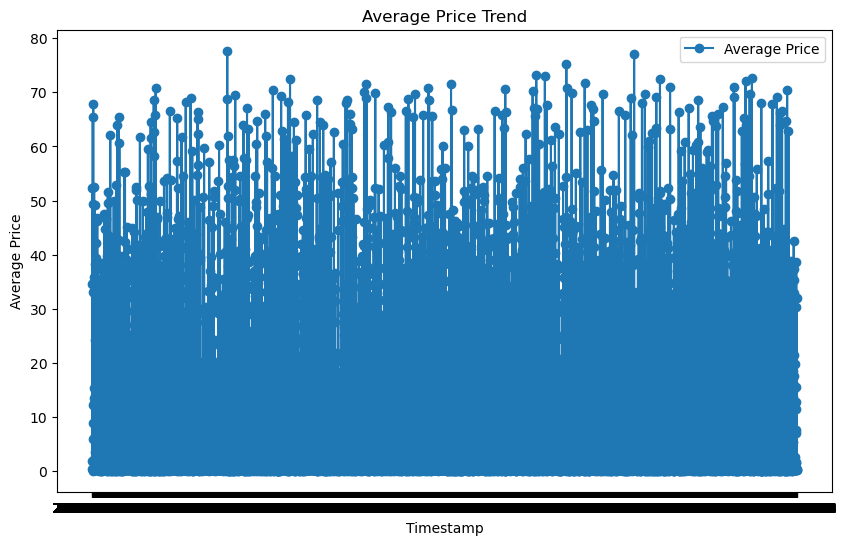

In [14]:
import matplotlib.pyplot as plt

# Plot average price trend
df['avg_price'] = (df['open_price'] + df['close_price'] + df['high_price'] + df['low_price']) / 4
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['avg_price'], label='Average Price', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Average Price')
plt.title('Average Price Trend')
plt.legend()
plt.show()


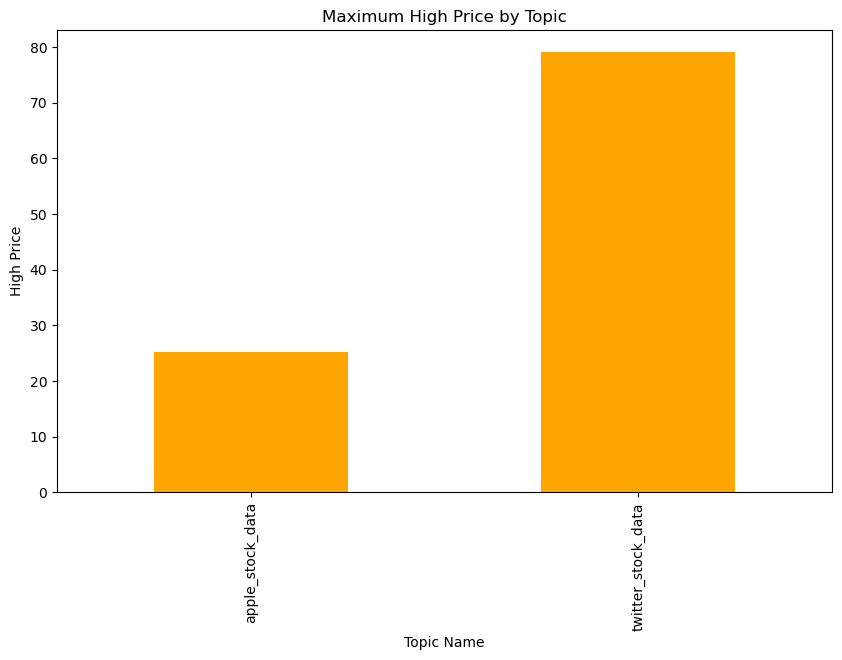

In [15]:
# Group by topic and calculate max high price
high_price_by_topic = df.groupby('topic_name')['high_price'].max()
high_price_by_topic.plot(kind='bar', figsize=(10, 6), color='orange')
plt.xlabel('Topic Name')
plt.ylabel('High Price')
plt.title('Maximum High Price by Topic')
plt.show()


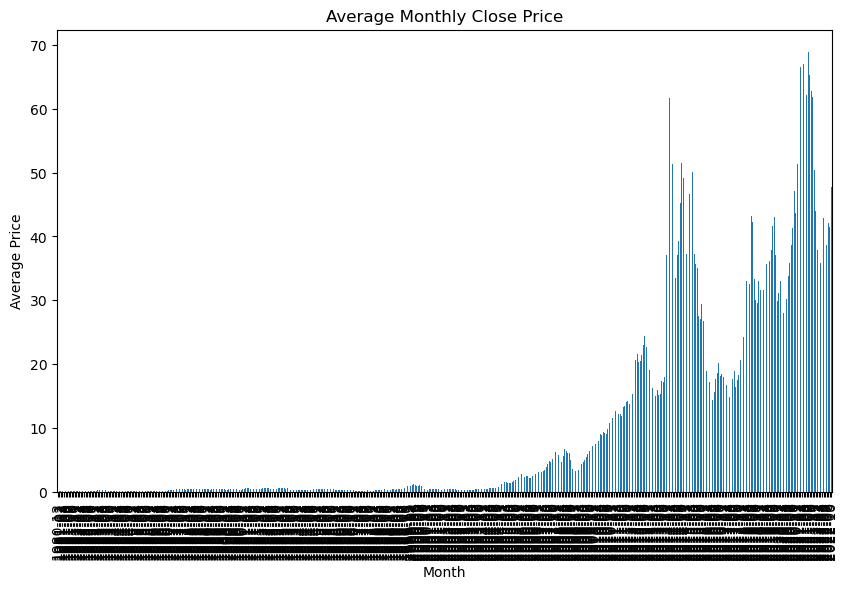

In [17]:

# Convert DynamoDB data to Pandas DataFrame
df = pd.DataFrame(data)


# Convert numeric columns from Decimal to float
for col in ['open_price', 'close_price', 'high_price', 'low_price', 'volume']:
    df[col] = df[col].apply(lambda x: float(x))

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Example: Plot average monthly close price
df['month'] = df['timestamp'].dt.to_period('M')
avg_monthly_price = df.groupby('month')['close_price'].mean()

# Plotting
avg_monthly_price.plot(kind='bar', title='Average Monthly Close Price', xlabel='Month', ylabel='Average Price', figsize=(10, 6))
plt.show()


In [ ]:
df.head()

In [22]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
import datetime

# DynamoDB connection
def fetch_data_from_dynamodb(table_name, region="us-east-2"):
    """Fetch all data from a specified DynamoDB table."""
    dynamodb = boto3.resource('dynamodb', region_name=region)
    table = dynamodb.Table(table_name)
    
    # Scan the table to fetch all records
    response = table.scan()
    items = response['Items']

    # Paginate through all items if needed
    while 'LastEvaluatedKey' in response:
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        items.extend(response['Items'])
        .
    
    return items

In [23]:

# Convert DynamoDB Decimal to float
def decimal_to_float(item):
    """Convert DynamoDB Decimal values to float."""
    for key, value in item.items():
        if isinstance(value, Decimal):
            item[key] = float(value)
    return item

In [24]:



# Visualization
def visualize_data(data, year, topic_name):
    """Visualize data for a particular year and topic."""
    # Convert data to DataFrame
    data = [decimal_to_float(item) for item in data if item['topic_name'] == topic_name]
    df = pd.DataFrame(data)

    # Ensure the timestamp is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Filter data for the specified year
    df = df[df['timestamp'].dt.year == year]

    # Calculate average prices for each month
    df['month'] = df['timestamp'].dt.month
    avg_prices = df.groupby('month')['close_price'].mean()

    # Plot average prices
    plt.figure(figsize=(10, 6))
    avg_prices.plot(kind='line', marker='o', label=f'Avg Price ({topic_name})')
    plt.title(f'Average Close Price for {topic_name} ({year})')
    plt.xlabel('Month')
    plt.ylabel('Average Close Price')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid()
    plt.show()

    # Plot high prices
    max_prices = df.groupby('month')['high_price'].max()
    plt.figure(figsize=(10, 6))
    max_prices.plot(kind='line', marker='s', label=f'High Price ({topic_name})')
    plt.title(f'High Prices for {topic_name} ({year})')
    plt.xlabel('Month')
    plt.ylabel('High Price')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid()
    plt.show()   


In [26]:
table_name = "StockData"  # Replace with your DynamoDB table name
year = 2024  # Replace with the year you want to visualize
topic_name1 = "apple_stock_data"  # Replace with your first topic
topic_name2 = "twitter_stock_data"  # Replace with your second topic

In [28]:
# Fetch data
print("Fetching data from DynamoDB...")
data = fetch_data_from_dynamodb(table_name)

Fetching data from DynamoDB...


Visualizing data for apple_stock_data...


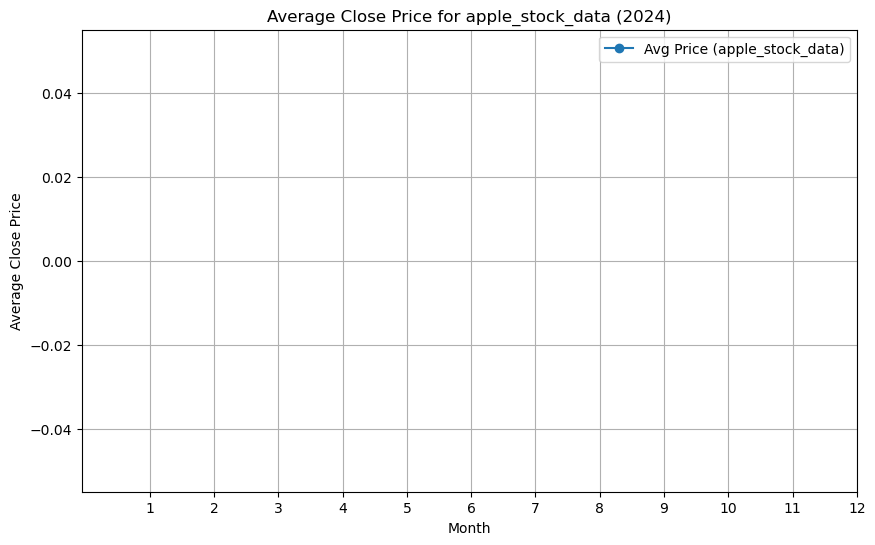

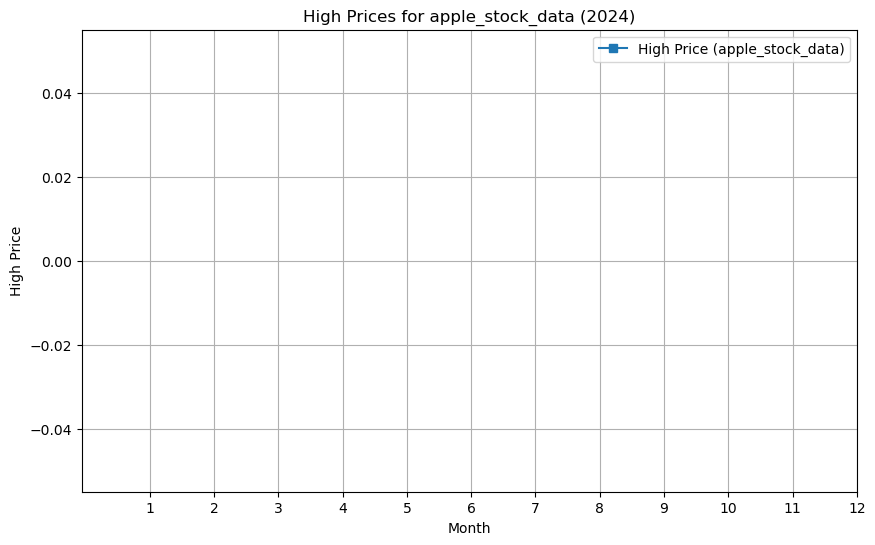

Visualizing data for twitter_stock_data...


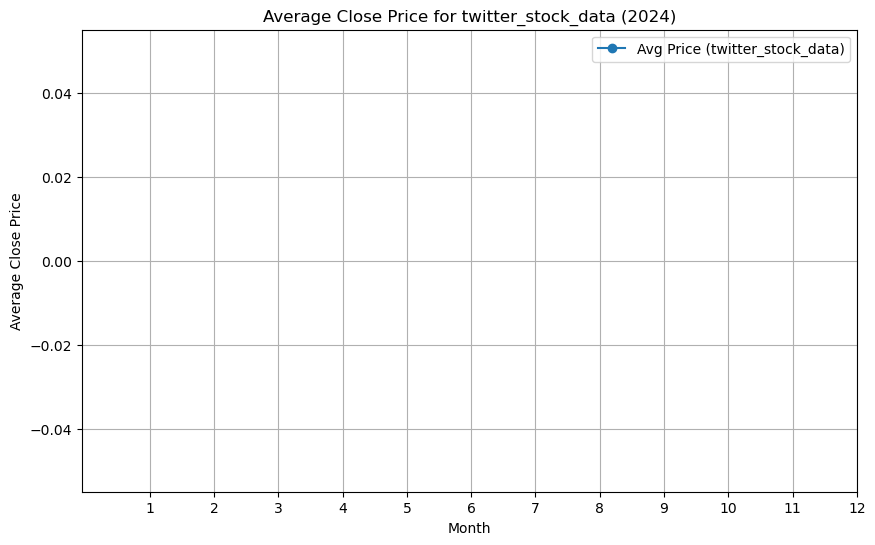

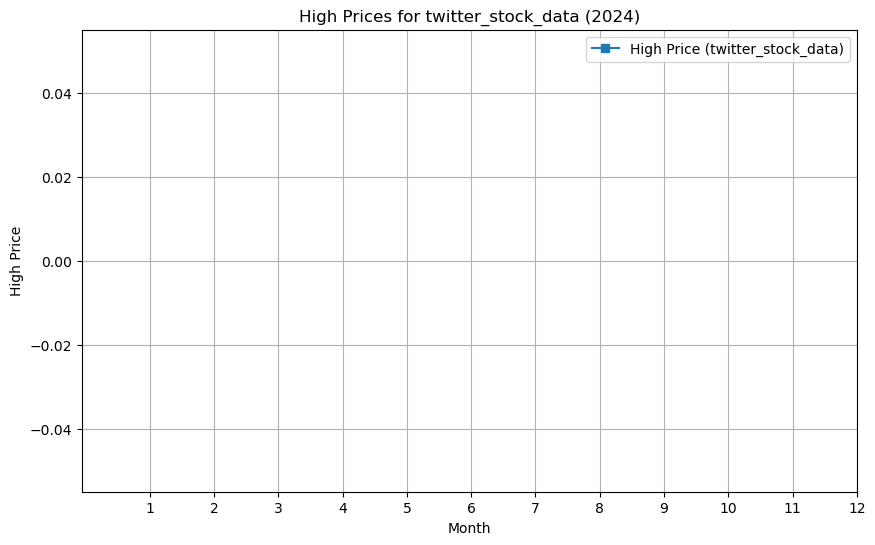

In [29]:
 # Visualize for topic 1
print(f"Visualizing data for {topic_name1}...")
visualize_data(data, year, topic_name1)

# Visualize for topic 2
print(f"Visualizing data for {topic_name2}...")
visualize_data(data, year, topic_name2)